<a href="https://colab.research.google.com/github/Kaviyarasi2608Murugan/healthcare-prediction/blob/main/Phase_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset (change path if needed)
df =pd.read_csv("NHANES_age_prediction.csv")  # Replace with actual file name

# --------------------------------------------
# 1. Inspect the data
print("Initial shape:", df.shape)
print(df.head())

# --------------------------------------------
# 2. Handle missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Drop rows with missing values (if any)
df = df.dropna()

# --------------------------------------------
# 3. Remove duplicates
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# Drop duplicate rows
df = df.drop_duplicates()

# Convert all columns to numeric (if not already), coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Check for any values that are not 0 or 1 (invalid for binary data)
invalid_data = ~df.isin([0, 1])  # True for values not in [0,1]
if invalid_data.any().any():
    print("\nInvalid binary values found in the following rows:")
    print(df[invalid_data.any(axis=1)])
else:
    print("\nAll values are valid binary (0 or 1).")

# --------------------------------------------
# 5. Final cleaned dataset
print("\nCleaned dataset shape:", df.shape)
print(df.head())

# Optional: Save the cleaned data
df.to_csv("cleaned_dataset.csv", index=False)


Initial shape: (2278, 10)
      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  

Missing values per column:
 SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

Number of duplicate rows: 0

Invalid binary values found in the following rows:
         SEQN  age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0        NaN      61.0       2.0     2

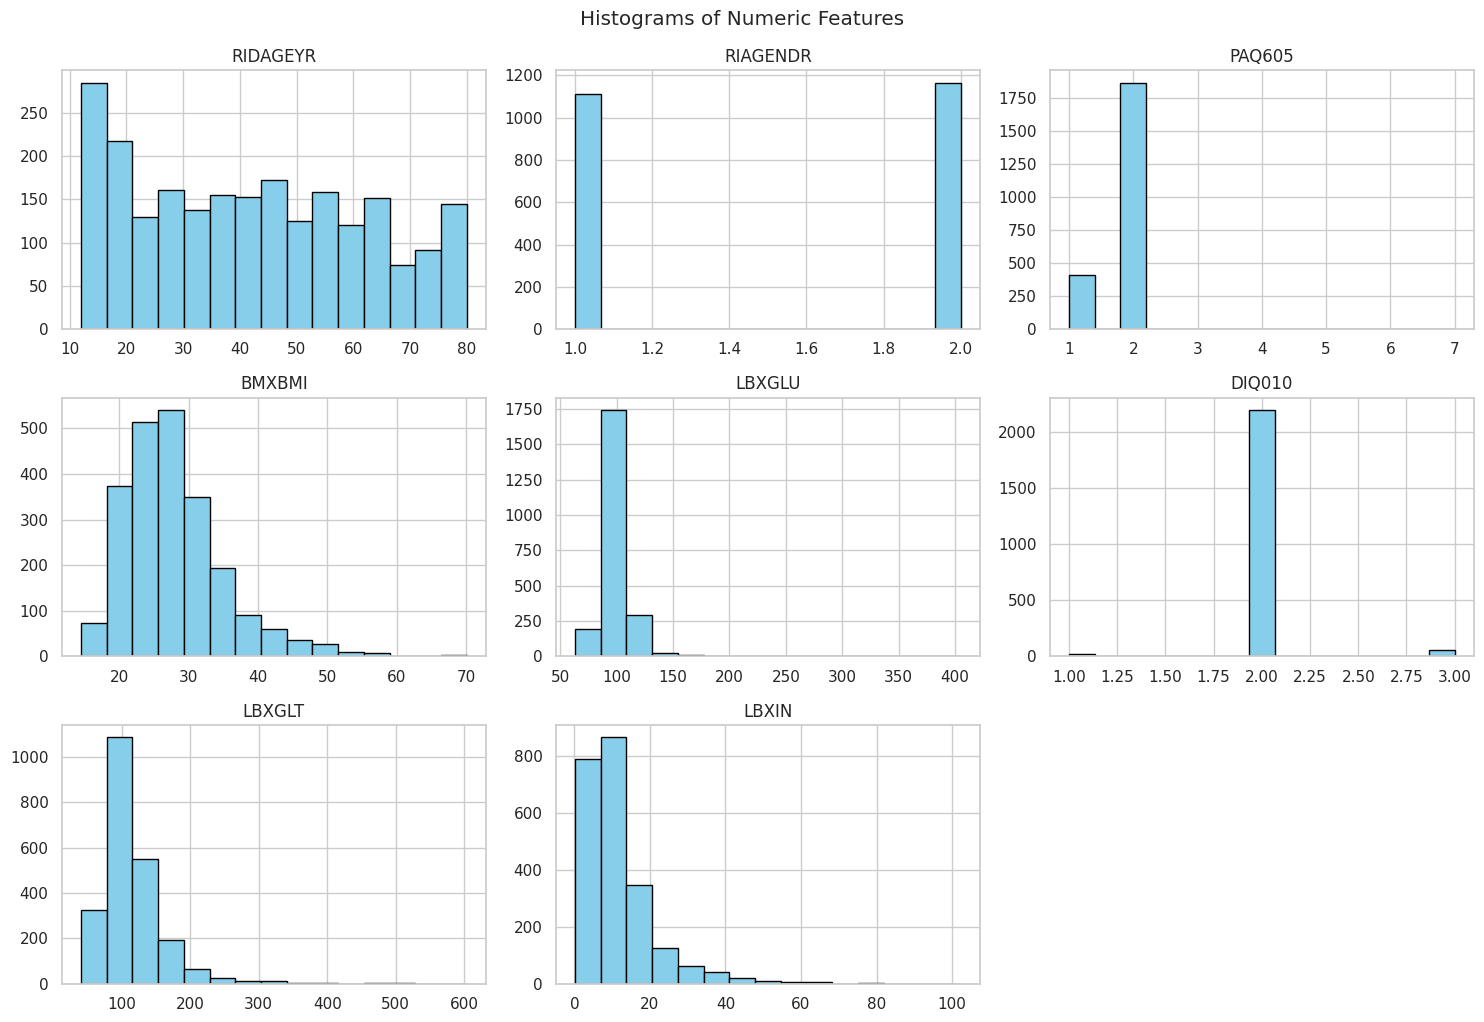

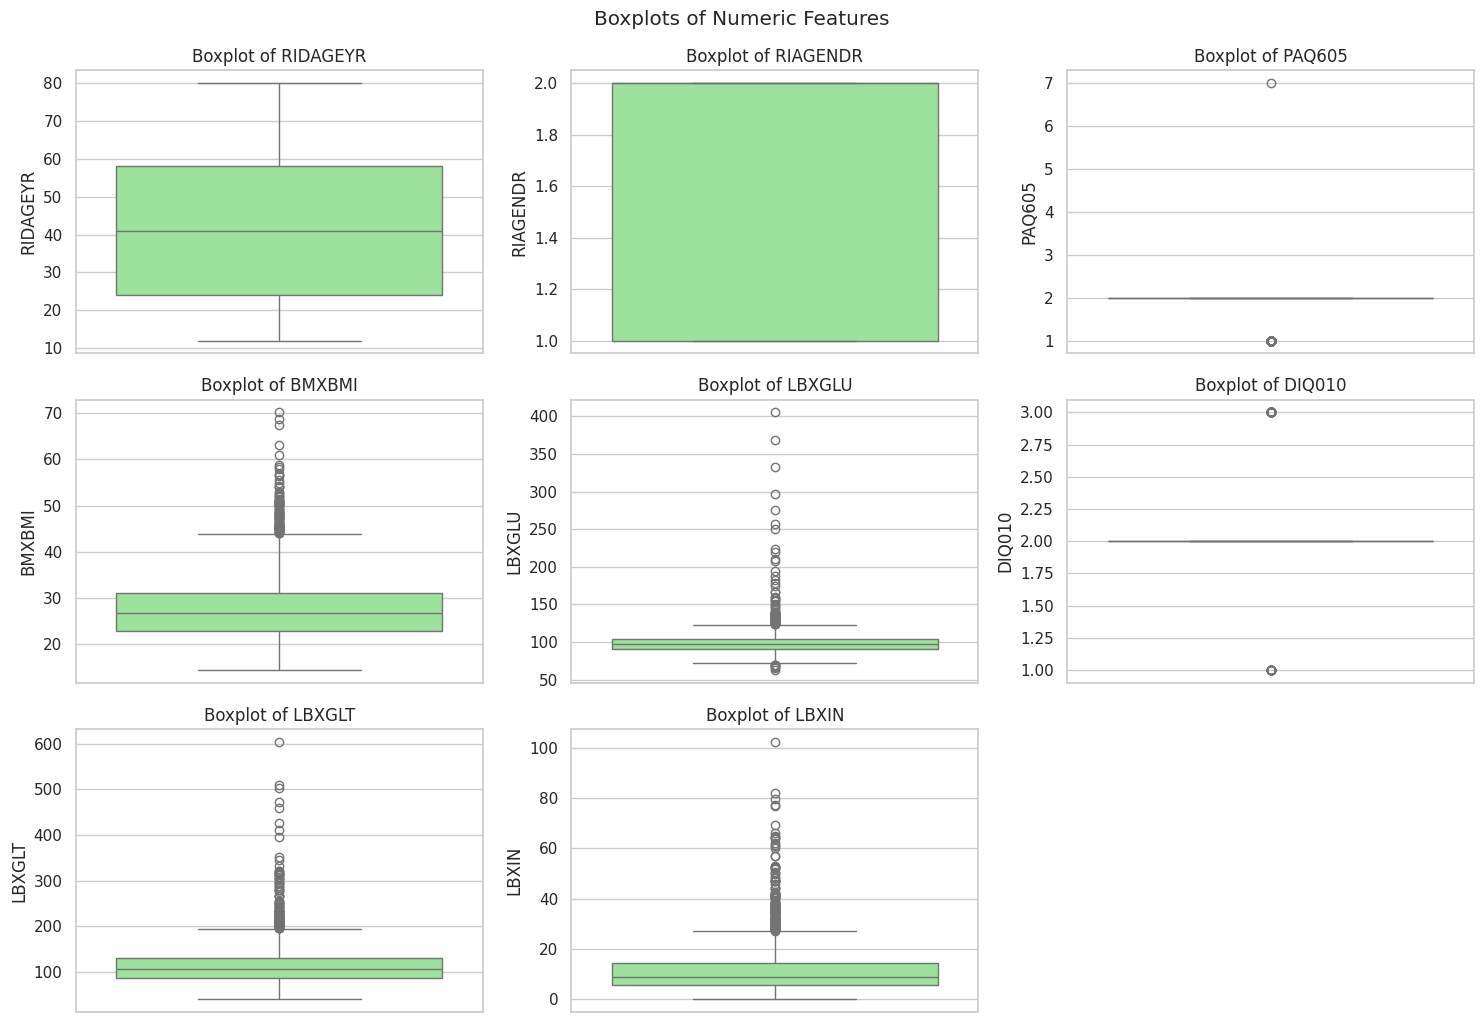

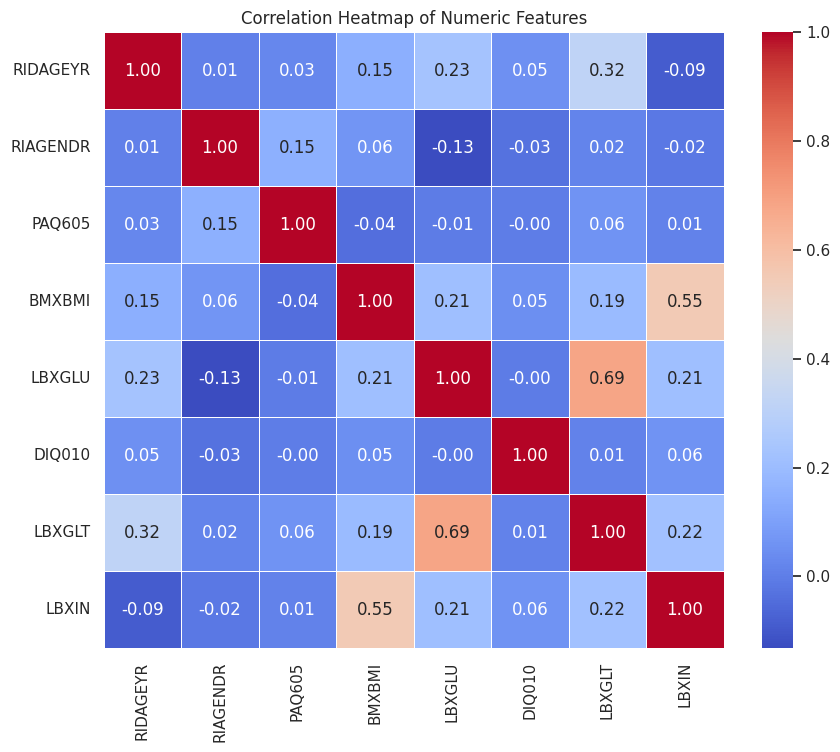

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# Drop non-numeric and identifier columns to create EDA-ready DataFrame
eda_df = df.drop(columns=['SEQN', 'age_group'], errors='ignore')

# Set visual style
sns.set(style="whitegrid")

# 1. Histograms
eda_df.hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.show()

# 2. Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(eda_df.select_dtypes(include='number').columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=eda_df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.suptitle('Boxplots of Numeric Features', y=1.02)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = eda_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load and prepare data
df = pd.read_csv("cleaned_dataset.csv")
X = df.drop(columns=['SEQN', 'age_group', 'DIQ010'], errors='ignore')
y = df['DIQ010']  # target: diabetes status

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.97      1.00      0.98       442
         3.0       0.00      0.00      0.00        11

    accuracy                           0.97       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.94      0.97      0.95       456

Random Forest Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.97      1.00      0.98       442
         3.0       0.00      0.00      0.00        11

    accuracy                           0.97       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.94      0.97      0.95       456



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

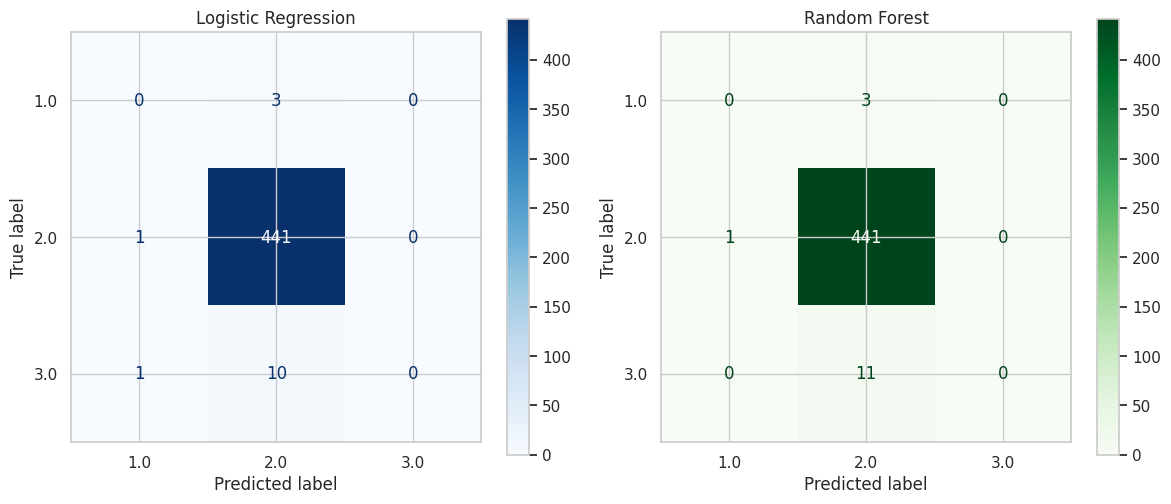

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your cleaned dataset
import pandas as pd
df = pd.read_csv("cleaned_dataset.csv")

# Prepare features and target
X = df.drop(columns=['SEQN', 'age_group', 'DIQ010'], errors='ignore')
y = df['DIQ010']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Visualization: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap="Greens")
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


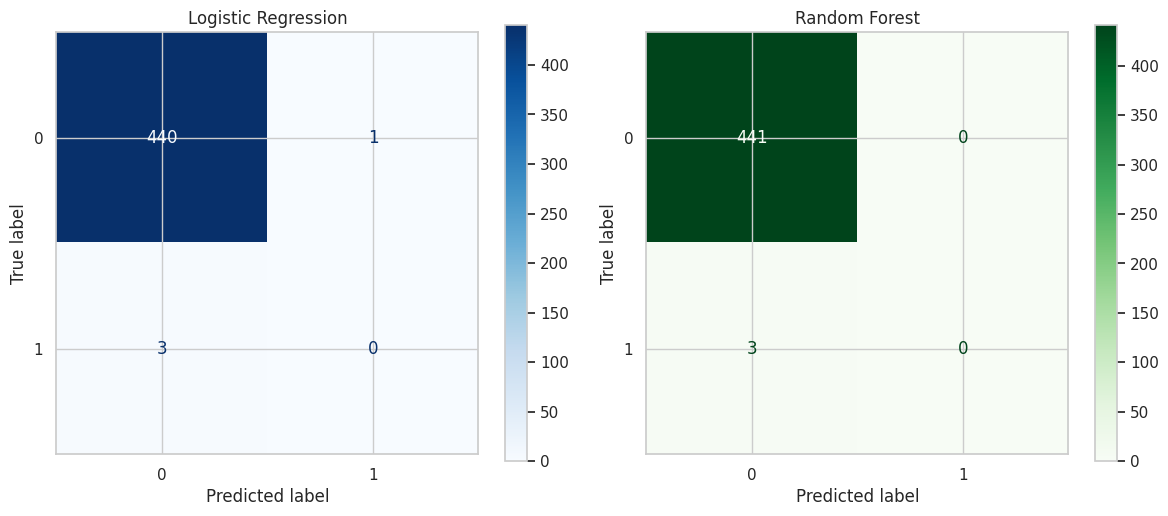

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


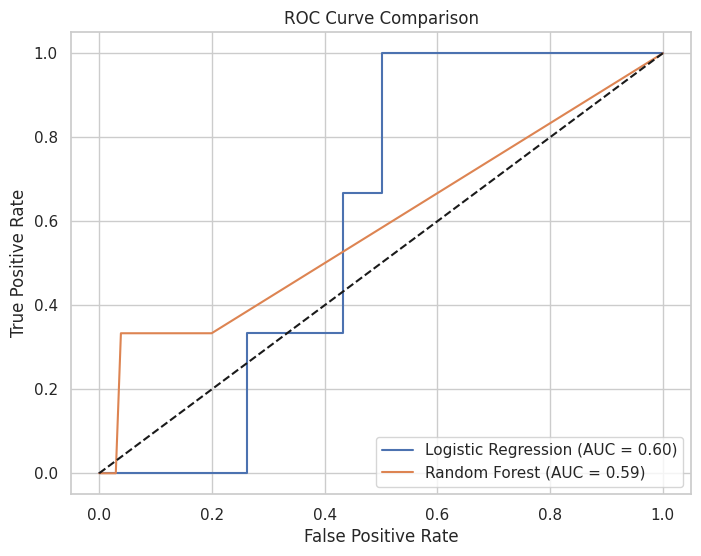

In [ ]:
from sklearn.metrics import roc_curve

# Get probabilities
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Random Forest metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print or save metrics
print("Logistic Regression:\n", f"Accuracy: {acc_lr}, Precision: {prec_lr}, Recall: {recall_lr}, F1: {f1_lr}, AUC: {roc_auc_lr}")
print("\nRandom Forest:\n", f"Accuracy: {acc_rf}, Precision: {prec_rf}, Recall: {recall_rf}, F1: {f1_rf}, AUC: {roc_auc_rf}")


Logistic Regression:
 Accuracy: 0.990990990990991, Precision: 0.0, Recall: 0.0, F1: 0.0, AUC: 0.6009070294784581

Random Forest:
 Accuracy: 0.9932432432432432, Precision: 0.0, Recall: 0.0, F1: 0.0, AUC: 0.5888133030990174


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
0  Logistic Regression  0.990991        0.0     0.0       0.0  0.600907
1        Random Forest  0.993243        0.0     0.0       0.0  0.588813


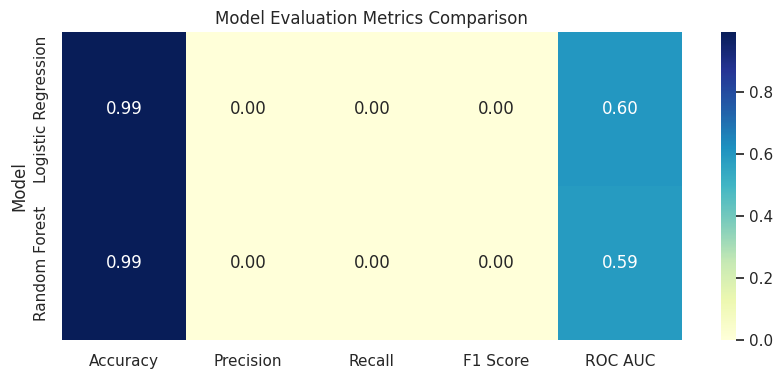

In [ ]:
import pandas as pd

# Create a comparison table
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_lr, acc_rf],
    "Precision": [prec_lr, prec_rf],
    "Recall": [recall_lr, recall_rf],
    "F1 Score": [f1_lr, f1_rf],
    "ROC AUC": [roc_auc_lr, roc_auc_rf]
})

print(metrics_df)
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Evaluation Metrics Comparison")
plt.show()


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error
)
import numpy as np

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_prob))

# Display
print("📊 Evaluation Metrics")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"RMSE (prob)  : {rmse:.4f}")


📊 Evaluation Metrics
Accuracy     : 0.9887
Precision    : 0.3333
Recall       : 0.2500
F1 Score     : 0.2857
ROC AUC      : 0.9219
RMSE (prob)  : 0.0937



📊 Evaluation Metrics
Accuracy     : 0.9887
Precision    : 0.3333
Recall       : 0.2500
F1 Score     : 0.2857
ROC AUC      : 0.9219
RMSE         : 0.0937


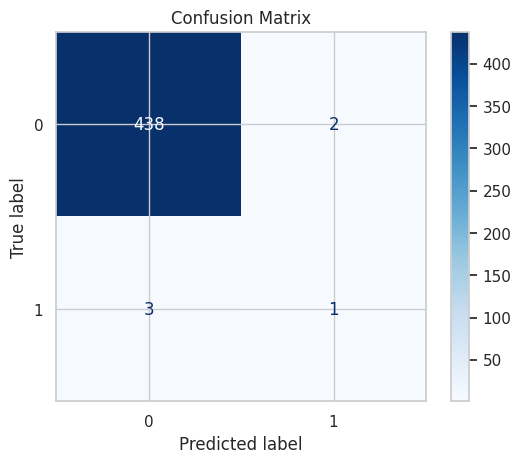

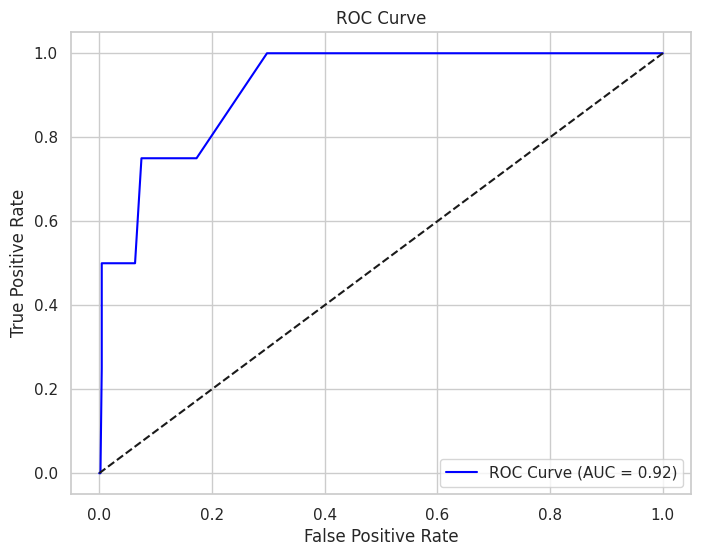

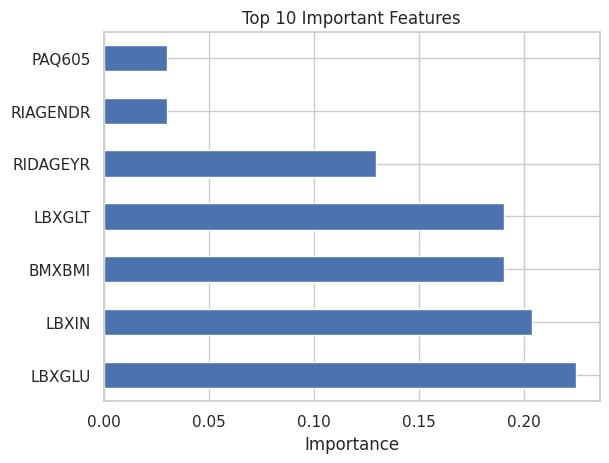

In [ ]:
# ========================================
# Diabetes Prediction: Source Code
# ========================================

# 1. 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, mean_squared_error
)

# 2. 📂 Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# 3. 🧹 Clean & Prepare Target Variable
df = df[df['DIQ010'].isin([1, 2])]         # Keep only 1 (Yes) and 2 (No)
df['DIQ010'] = df['DIQ010'].map({1: 1, 2: 0})

# 4. 🧾 Feature/Target Split
X = df.drop(columns=['SEQN', 'age_group', 'DIQ010'], errors='ignore')
y = df['DIQ010']

# 5. ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. 📏 Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. ⚙️ Model Training (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 8. 📈 Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 9. ✅ Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_prob))

print("\n📊 Evaluation Metrics")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"RMSE         : {rmse:.4f}")

# 10. 🧮 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 11. 📉 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 12. 📊 Feature Importance (Optional)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()
